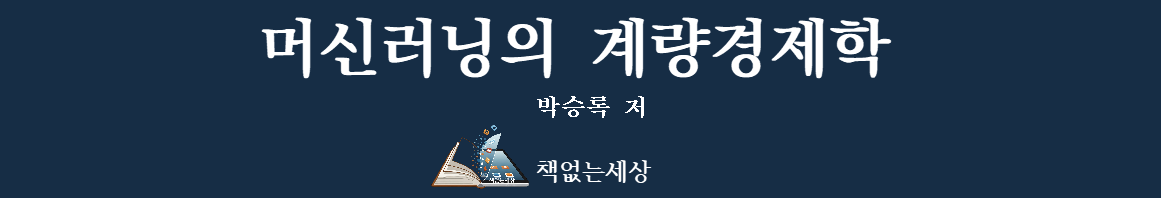

# Part 7 시계열 분석 

## Chapter 3: 벡터 자기 회귀모형(VAR)

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [2]:
# 본서에서 사용되는 모든 Library 불러오기 
exec(open('Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""\

In [3]:
# 한국의 거시경제 통계자료 불러오기
data = pd.read_csv('Data/Korea_GDP.csv',index_col='Time', parse_dates=True)
new_index = pd.date_range(start='1961-03-31', periods=len(data), freq='Q')
data.index = pd.to_datetime(new_index)
data.index

DatetimeIndex(['1961-03-31', '1961-06-30', '1961-09-30', '1961-12-31',
               '1962-03-31', '1962-06-30', '1962-09-30', '1962-12-31',
               '1963-03-31', '1963-06-30',
               ...
               '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
               '2022-09-30', '2022-12-31', '2023-03-31', '2023-06-30',
               '2023-09-30', '2023-12-31'],
              dtype='datetime64[ns]', length=252, freq='Q-DEC')

In [4]:
df = data[[ 'gdp', 'inv', 'con']]
df

,gdp,inv,con
1961-03-31,7000.7,-659.9,8957.5
1961-06-30,8141.3,1736.8,6593.8
1961-09-30,6970.2,833.2,6308.6
1961-12-31,8974.2,950.7,8740.5
1962-03-31,7444.8,-727.9,9670.8
...,...,...,...
2022-12-31,513770.2,159480.4,235677.7
2023-03-31,472155.5,132942.8,233780.3
2023-06-30,497345.6,146189.8,229263.8
2023-09-30,500997.0,148498.3,233387.8


In [5]:
# 퍼센트 변화(percent change) 
df_gr = 100*df.pct_change(periods=4).dropna()
df_gr = df_gr.loc['1970-01-31':]
print(df_gr)

                  gdp        inv        con
1970-03-31  10.549933  15.182119   9.949197
1970-06-30  13.740925   8.154760  12.070927
1970-09-30   4.770876 -16.469740  13.047604
1970-12-31  11.190926   8.575264   7.720308
1971-03-31  12.769138  24.960471  10.245914
...               ...        ...        ...
2022-12-31   1.396643   1.544364   3.266275
2023-03-31   0.898427   6.390072   4.555105
2023-06-30   0.888950   2.290931   1.571933
2023-09-30   1.384668  -1.694775   0.249133
2023-12-31   2.209665  -2.684719   0.932205

[216 rows x 3 columns]


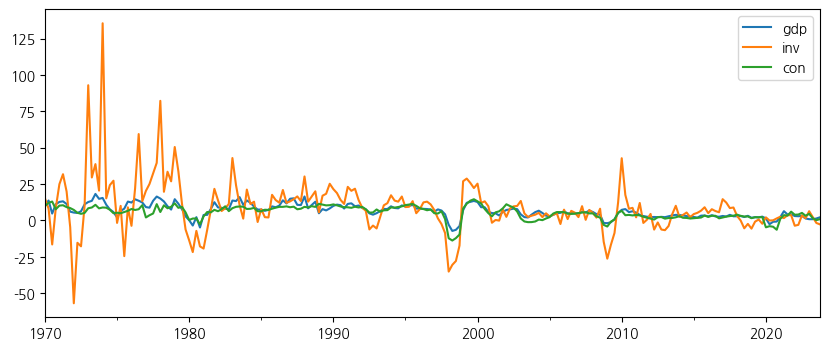

In [6]:
df_gr.plot(figsize=(10, 4));

### 나. VAR 모형의 차수 결정

In [7]:
for i in range(1, 9):
    model = VAR(df_gr)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  8.449275022670554
BIC:  8.63740365679861

Order = 2
AIC:  8.364350313445808
BIC:  8.69465637099468

Order = 3
AIC:  8.275765791007187
BIC:  8.749187222797246

Order = 4
AIC:  8.264258918474475
BIC:  8.881744129381119

Order = 5
AIC:  8.250825404895057
BIC:  9.013333416301935

Order = 6
AIC:  8.28239204021608
BIC:  9.190892655696537

Order = 7
AIC:  8.335843746843201
BIC:  9.391317721147878

Order = 8
AIC:  8.283773390616574
BIC:  9.487212602047338



In [8]:
# 적정시치 확인
model.select_order(8)
results = model.fit(maxlags=8, ic='aic')
lag_order = results.k_ar
print(lag_order)

2


### 다. 모형의 추정

In [9]:
model = VAR(df_gr)
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Jul, 2025
Time:                     10:05:36
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    9.01333
Nobs:                     211.000    HQIC:                   8.55905
Log likelihood:          -1720.65    FPE:                    3834.14
AIC:                      8.25083    Det(Omega_mle):         3079.20
--------------------------------------------------------------------
Results for equation gdp
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.593682         0.358214            1.657           0.097
L1.gdp         0.704255         0.092925            7.579           0.000
L1.inv        -0.009616         0.012194           -0.789           0.430
L1.con         0

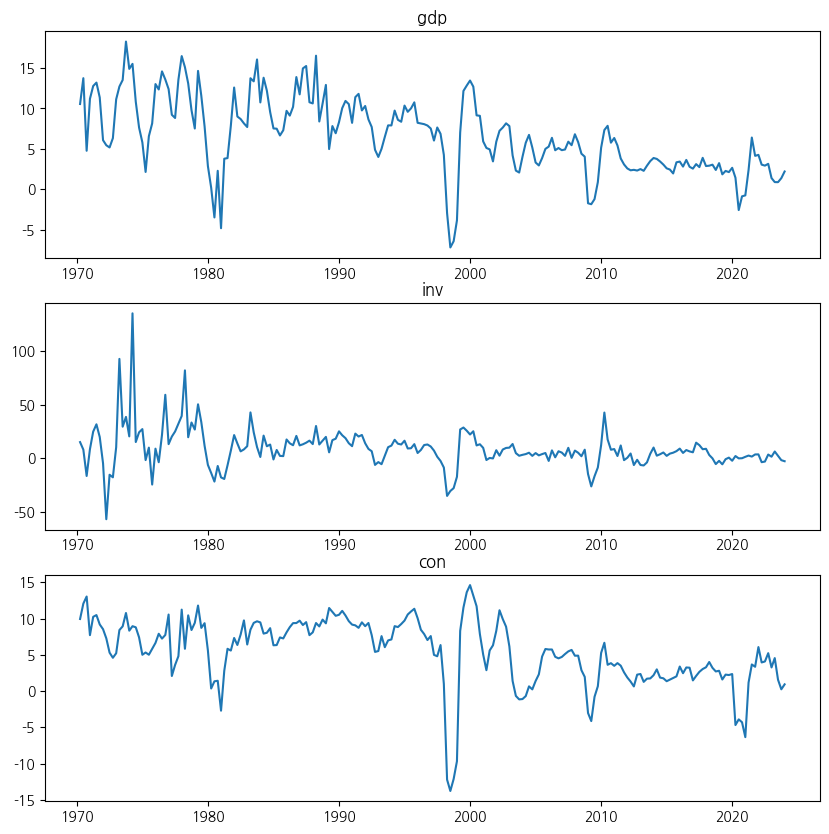

In [10]:
results.plot();

### 라. 진단

#### 1) 잔차의 자기상관 여부 검정

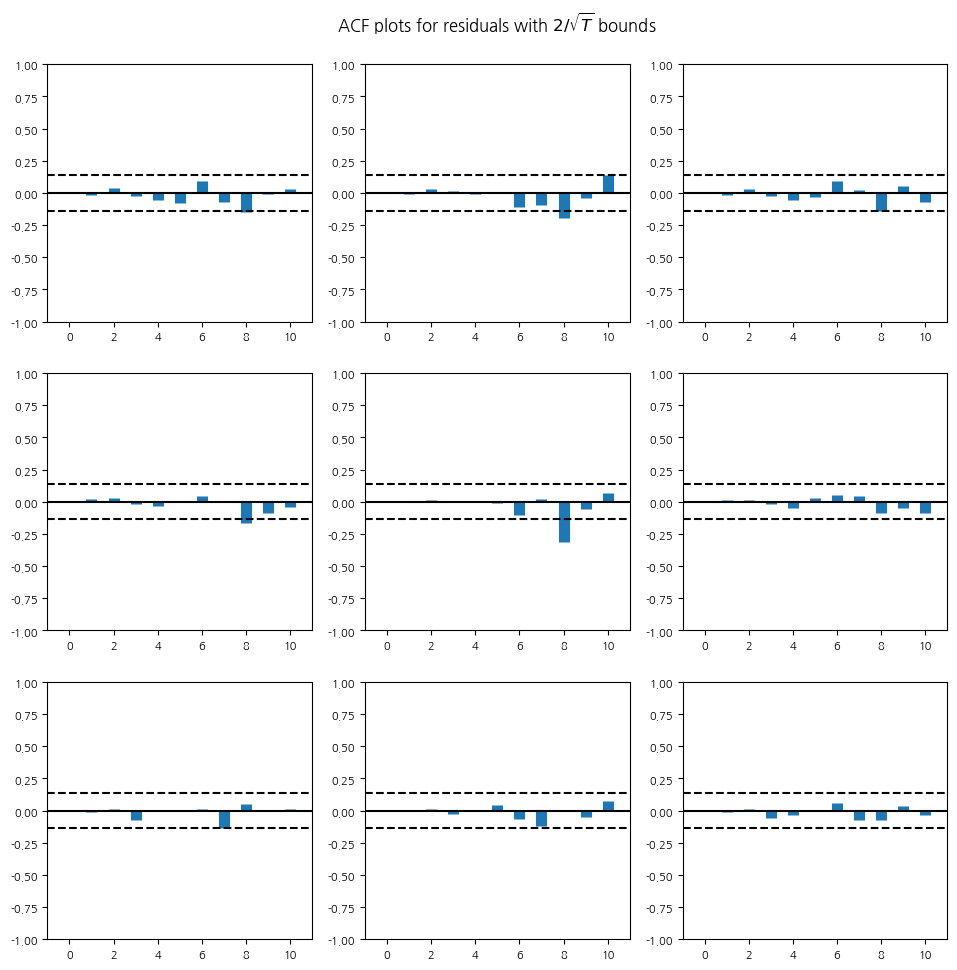

In [17]:
results.plot_acorr();

#### 2) 잔차의 정규성 여부 검정

In [11]:
nor = results.test_normality()
nor.summary()

Test statistic,Critical value,p-value,df
4860.,12.59,0.000,6


#### 3) 인과성

In [12]:
cau_gdp = results.test_causality('gdp', ['inv', 'con'], kind='f')
cau_gdp.summary()

Test statistic,Critical value,p-value,df
2.934,1.847,0.001,"(10, 585)"


### 마. 충격 반응함수
#### 1) 충격 반응함수

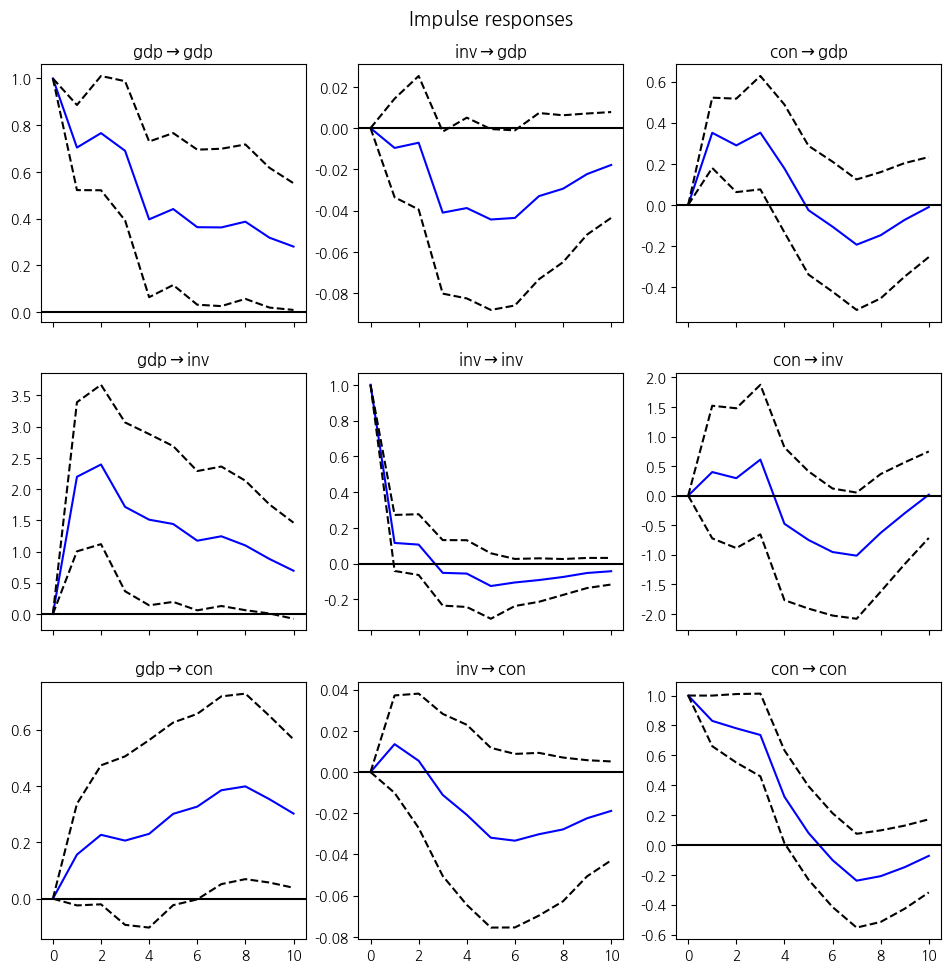

In [15]:
irf = results.irf(10)  
irf.plot(orth=False);

#### 2) 직교화된 충격 반응함수

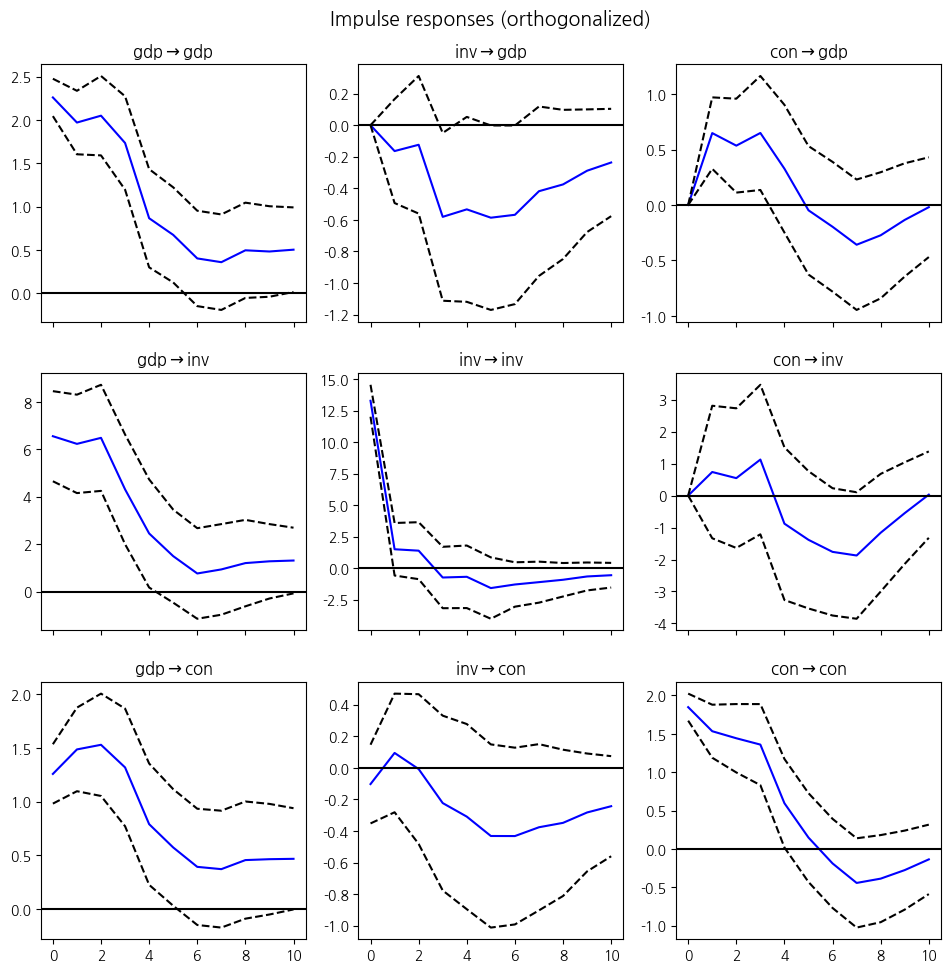

In [16]:
irf = results.irf(10)  
irf.plot(orth=True);

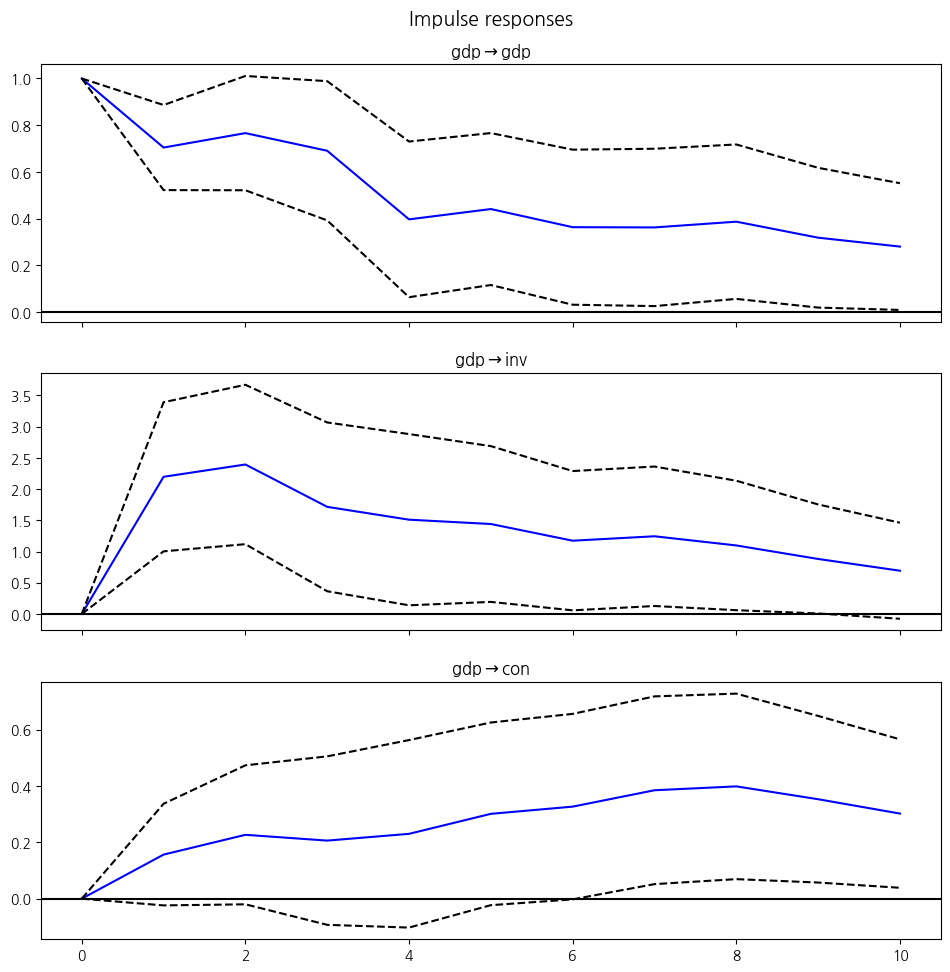

In [17]:
irf.plot(impulse='gdp', );

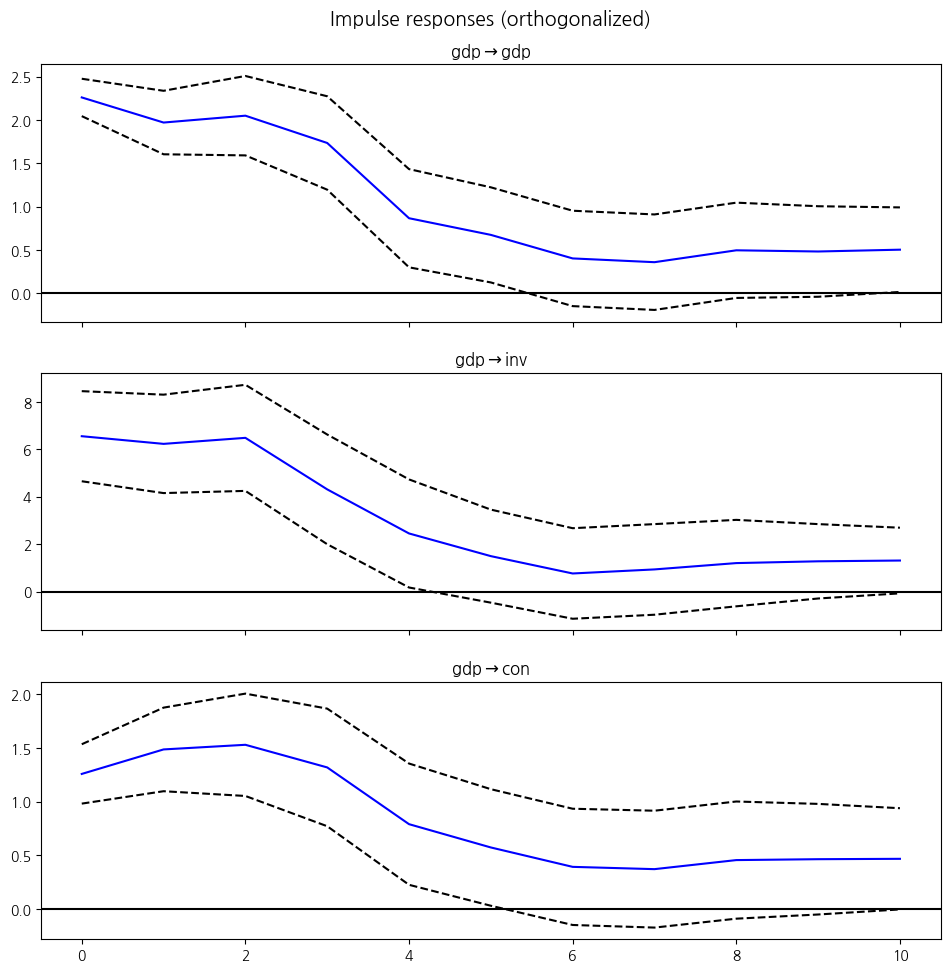

In [18]:
irf.plot(impulse='gdp', orth=True);

#### [보완] 누적 충격반응 함수

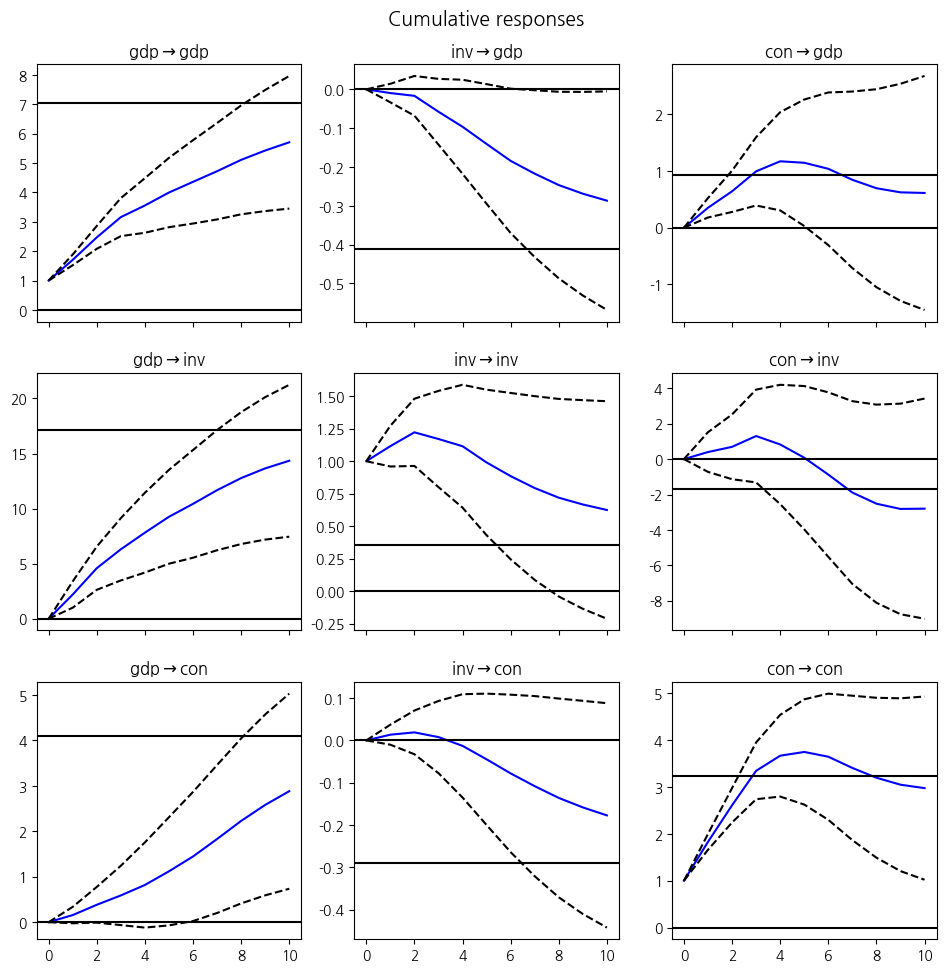

In [19]:
irf.plot_cum_effects(orth=False);

#### [보완] 직교화된 누적 충격반응 함수

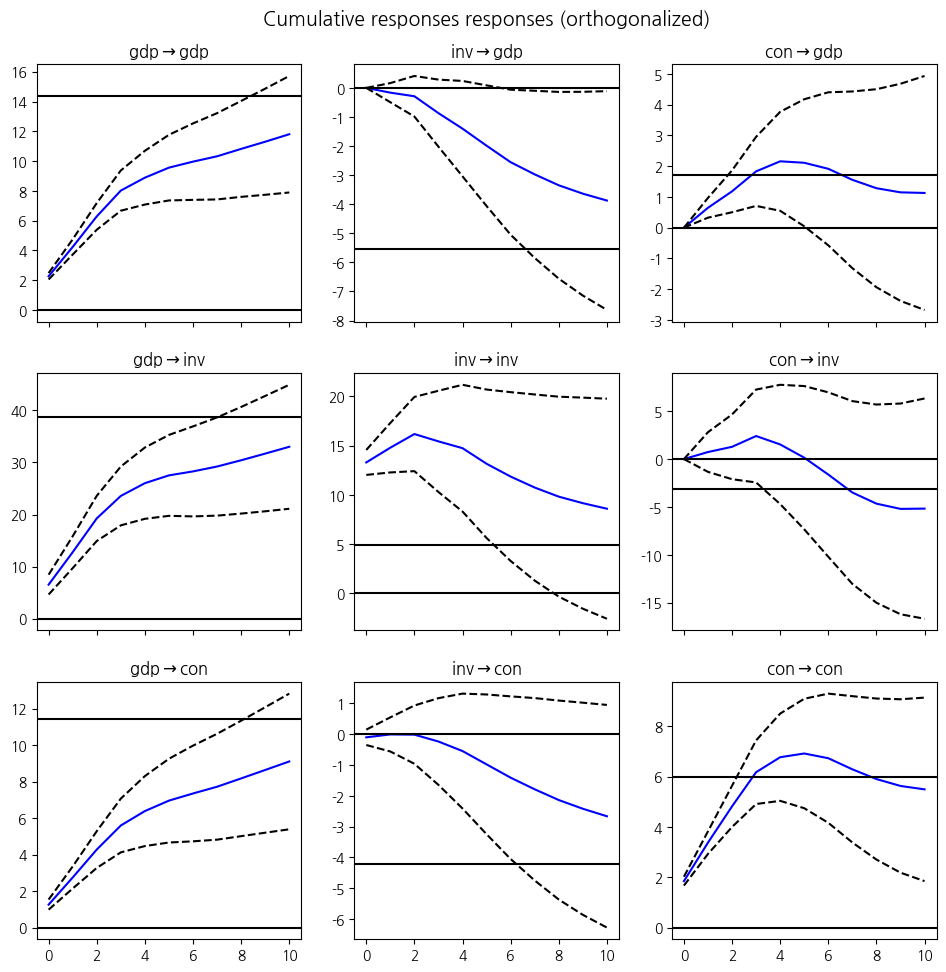

In [20]:
irf.plot_cum_effects(orth=True);

### 바. 예측 오차 분산의 분해

In [25]:
fevd = results.fevd(10)
fevd.summary() 

FEVD for gdp
          gdp       inv       con
0    1.000000  0.000000  0.000000
1    0.952663  0.002843  0.044494
2    0.946323  0.003027  0.050650
3    0.914923  0.021411  0.063666
4    0.899320  0.035189  0.065490
5    0.885832  0.051227  0.062941
6    0.870912  0.065868  0.063220
7    0.858907  0.072971  0.068122
8    0.851780  0.078052  0.070168
9    0.849364  0.080719  0.069916

FEVD for inv
          gdp       inv       con
0    0.195458  0.804542  0.000000
1    0.312868  0.685051  0.002082
2    0.405139  0.592107  0.002754
3    0.436786  0.556738  0.006477
4    0.445311  0.546034  0.008655
5    0.443155  0.542717  0.014129
6    0.437942  0.539160  0.022899
7    0.433402  0.534043  0.032555
8    0.433014  0.530956  0.036031
9    0.434709  0.528657  0.036633

FEVD for con
          gdp       inv       con
0    0.316516  0.002110  0.681373
1    0.396373  0.002035  0.601592
2    0.438528  0.001397  0.560076
3    0.446772  0.003933  0.549295
4    0.454471  0.008813  0.536716
5    0.

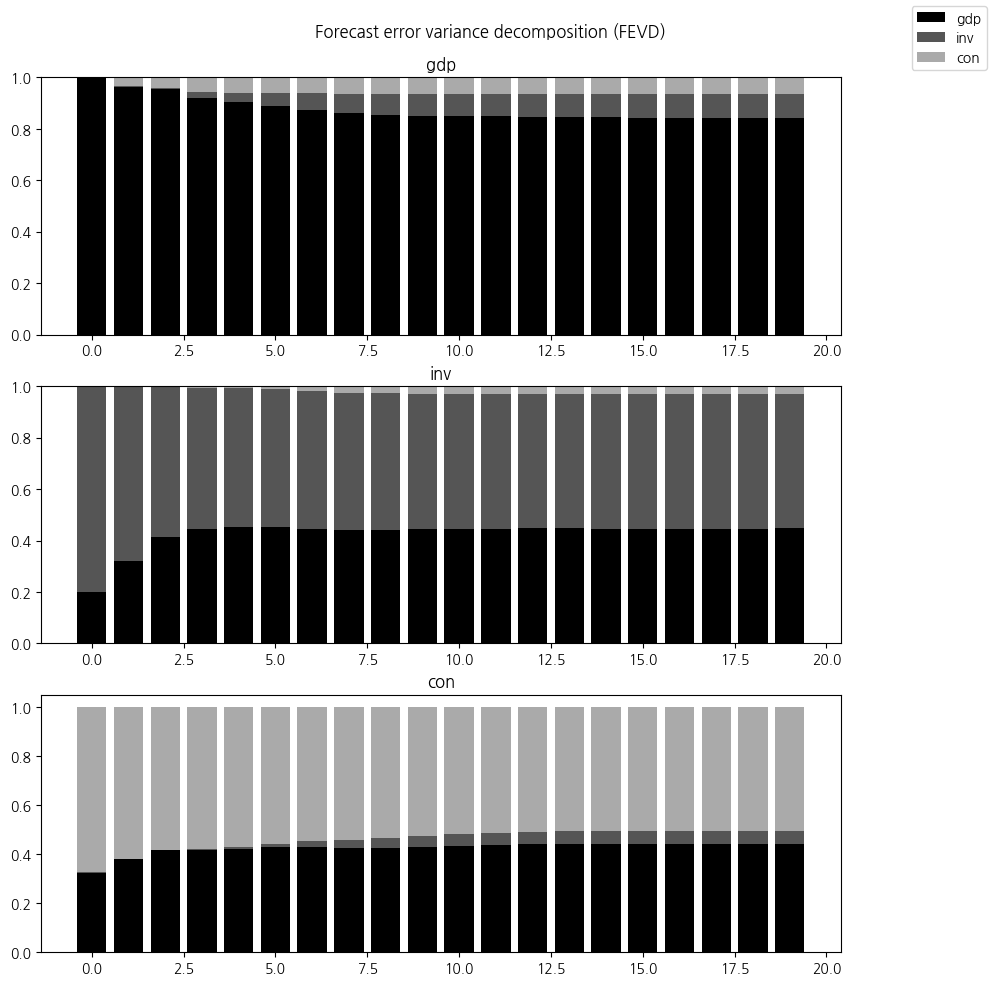

In [164]:
results.fevd(20).plot();

### 사. 예측

In [22]:
results.forecast(df_gr.values[lag_order:], 20)

array([[ 2.23241346, -1.97490974,  0.3034461 ],
       [ 2.6501556 , -0.37514797,  0.7873005 ],
       [ 3.23677992,  1.67431623,  1.53975455],
       [ 3.6203555 ,  2.85771073,  2.07966745],
       [ 4.29246898,  4.89442747,  2.95129127],
       [ 4.7383257 ,  5.85443358,  3.55107812],
       [ 5.03404994,  6.40837745,  3.95000641],
       [ 5.26854407,  6.60307393,  4.23918338],
       [ 5.31076912,  6.35095226,  4.30937901],
       [ 5.3492715 ,  6.16774016,  4.33194108],
       [ 5.38370509,  6.03849242,  4.33404109],
       [ 5.42047751,  6.05474675,  4.33323365],
       [ 5.51003712,  6.25275203,  4.37735612],
       [ 5.60160701,  6.4992803 ,  4.43601834],
       [ 5.69622454,  6.77505487,  4.50589287],
       [ 5.78442029,  7.01517192,  4.57784049],
       [ 5.84872261,  7.19226069,  4.63657547],
       [ 5.90130249,  7.32612445,  4.68666634],
       [ 5.94090752,  7.41822038,  4.72674012],
       [ 5.97244778,  7.49134024,  4.75946017]])

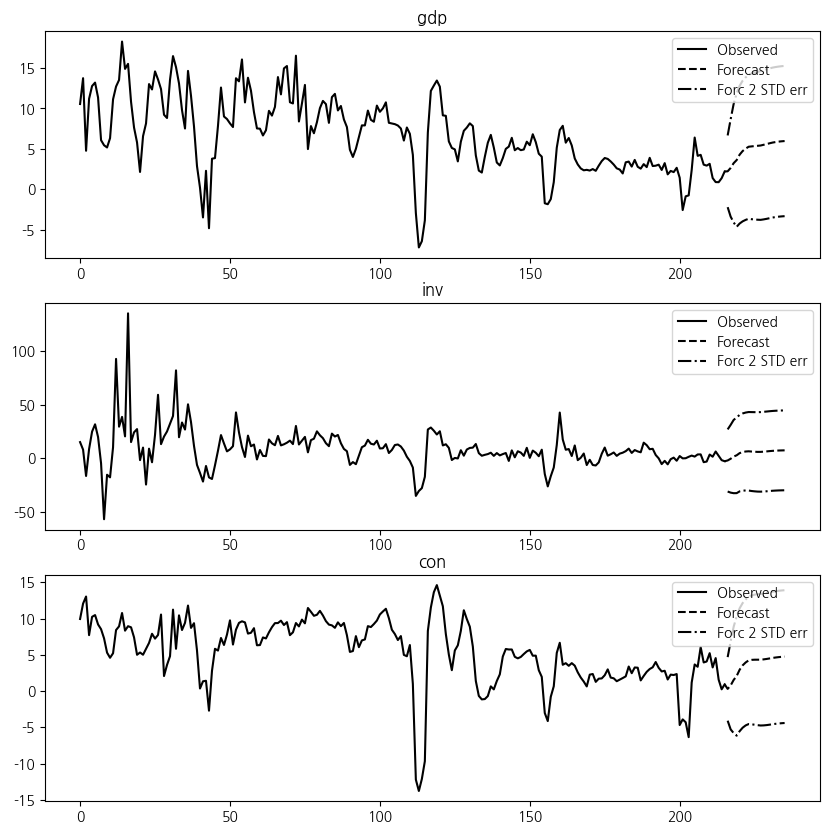

In [23]:
results.plot_forecast(20);

### SVAR

In [28]:
#define structural inputs
A = np.asarray([[1, 0, 0],['E', 1, 0],['E', 'E', 1]])
B = np.asarray([['E', 0, 0], [0, 'E', 0], [0, 0, 'E']])
A_guess = np.asarray([0.5, 0.25, -0.38])
B_guess = np.asarray([0.5, 0.1, 0.05])
mymodel = SVAR(df_gr, svar_type='AB', A=A, B=B, freq='Q')
res = mymodel.fit(maxlags=3, maxiter=10000, maxfun=10000, solver='bfgs')

In [29]:
fevd = res.fevd(10)
fevd.summary()

TypeError: SVARResults.irf() got an unexpected keyword argument 'var_decomp'

In [30]:
res.fevd(20).plot()

TypeError: SVARResults.irf() got an unexpected keyword argument 'var_decomp'

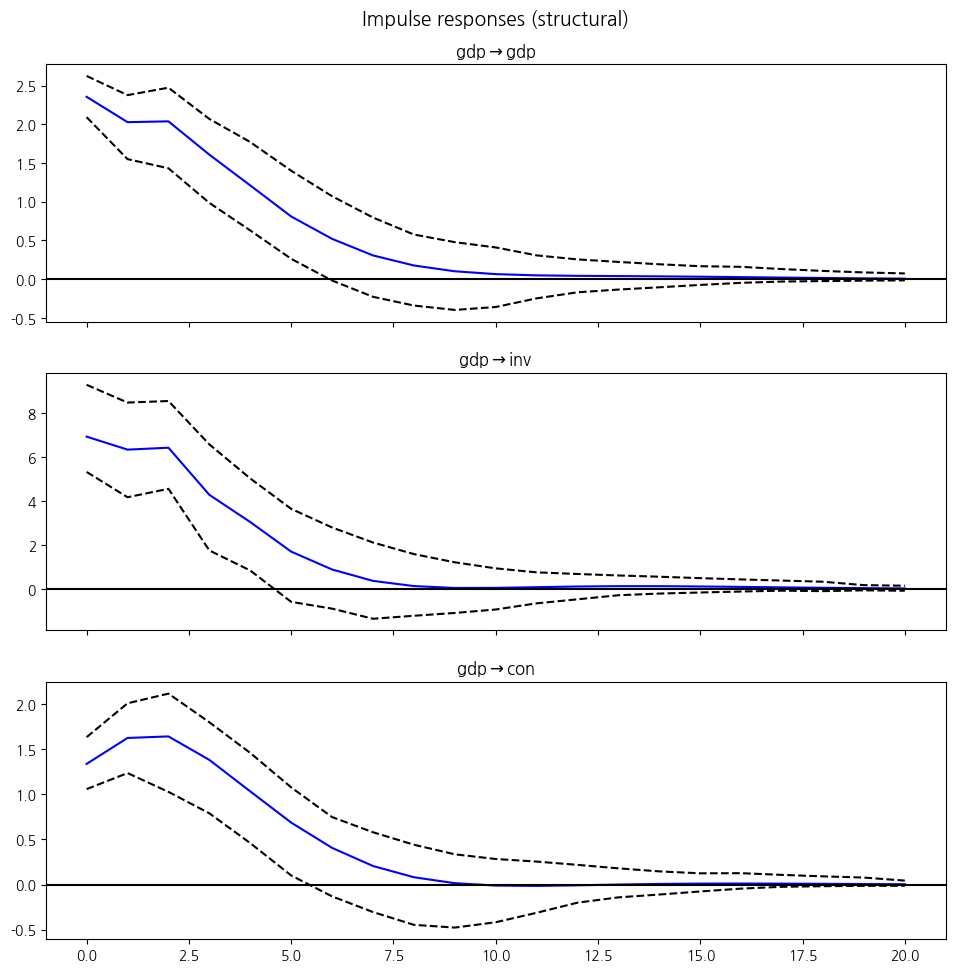

In [31]:
res.irf(periods=20).plot(impulse='gdp', plot_stderr=True,
                         stderr_type='mc', repl=100);

## 3. VAR 모형의 확장
### 가. VARX, VMA, VARMA 모형

In [51]:
# 한국의 거시경제 통계자료 불러오기
data = pd.read_csv('Data/Korea_GDP.csv',index_col='Time', parse_dates=True)
new_index = pd.date_range(start='1961-03-31', periods=len(data), freq='Q')
data.index = pd.to_datetime(new_index)
data.index

df = data[[ 'gdp', 'inv', 'con', 'gov']]
df

,gdp,inv,con,gov
1961-03-31,7000.7,-659.9,8957.5,3036.1
1961-06-30,8141.3,1736.8,6593.8,3079.9
1961-09-30,6970.2,833.2,6308.6,2980.0
1961-12-31,8974.2,950.7,8740.5,2922.3
1962-03-31,7444.8,-727.9,9670.8,3058.9
...,...,...,...,...
2022-12-31,513770.2,159480.4,235677.7,89949.2
2023-03-31,472155.5,132942.8,233780.3,94700.5
2023-06-30,497345.6,146189.8,229263.8,89060.8
2023-09-30,500997.0,148498.3,233387.8,82449.8


In [52]:
# 퍼센트 변화(percent change) 
df_gr = 100*df.pct_change(periods=4).dropna()
df_gr = df_gr.loc['1970-01-31':]
print(df_gr)

                  gdp        inv        con        gov
1970-03-31  10.549933  15.182119   9.949197  11.268465
1970-06-30  13.740925   8.154760  12.070927  10.218029
1970-09-30   4.770876 -16.469740  13.047604   5.365489
1970-12-31  11.190926   8.575264   7.720308   2.895987
1971-03-31  12.769138  24.960471  10.245914   8.024285
...               ...        ...        ...        ...
2022-12-31   1.396643   1.544364   3.266275   3.633842
2023-03-31   0.898427   6.390072   4.555105   4.038359
2023-06-30   0.888950   2.290931   1.571933   0.955933
2023-09-30   1.384668  -1.694775   0.249133   1.093703
2023-12-31   2.209665  -2.684719   0.932205  -0.923632

[216 rows x 4 columns]


In [26]:
endog = df_gr.loc[:, ['gdp', 'inv', 'con']]
exog = df_gr.loc[:, 'gov']

In [29]:
# VARX 
Model_VAR = VARMAX(endog=endog, order=(5,0), exog=exog)
Results_VAR = Model_VAR.fit(maxiter=1000, disp=False)

print(Results_VAR.summary())

                             Statespace Model Results                            
Dep. Variable:     ['gdp', 'inv', 'con']   No. Observations:                  216
Model:                           VARX(5)   Log Likelihood               -1776.193
                             + intercept   AIC                           3666.387
Date:                   Thu, 24 Jul 2025   BIC                           3858.778
Time:                           10:33:21   HQIC                          3744.113
Sample:                       03-31-1970                                         
                            - 12-31-2023                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):       0.00, 0.00, 0.02   Jarque-Bera (JB):   31.97, 4527.92, 419.63
Prob(Q):                  0.99, 1.00, 0.88   Prob(JB):                 0.00, 0.00, 0.00
Heteroskedasticity (H):   0.17, 0.10, 0.42   Skew:                   -0.11, 2.61, -0.7

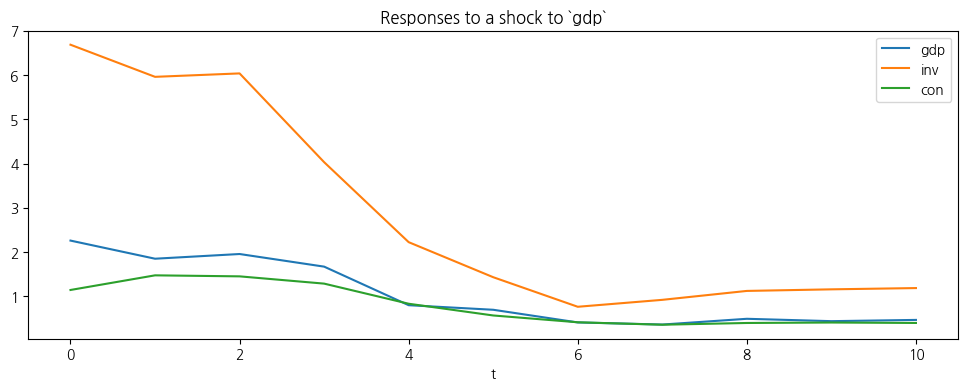

In [30]:
ax = Results_VAR.impulse_responses(10, orthogonalized=True, impulse=[1, 0, 0]).plot(figsize=(12,4))
ax.set(xlabel='t', title='Responses to a shock to `gdp`');

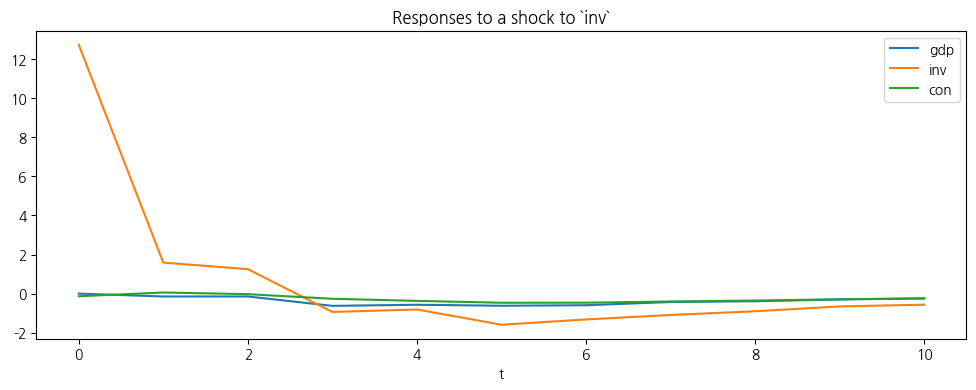

In [31]:
ax = Results_VAR.impulse_responses(10, orthogonalized=True, impulse=[0, 1, 0]).plot(figsize=(12,4))
ax.set(xlabel='t', title='Responses to a shock to `inv`');

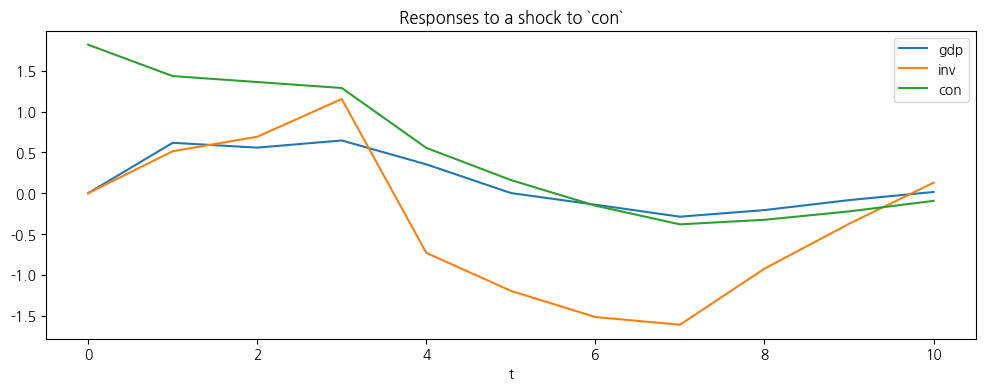

In [32]:
ax = Results_VAR.impulse_responses(10, orthogonalized=True, impulse=[0, 0, 1]).plot(figsize=(12,4))
ax.set(xlabel='t', title='Responses to a shock to `con`');

In [33]:
# VMA 
Model_VMA = VARMAX(endog, order=(0, 2), error_cov_type='diagonal')
Results_VMA = Model_VMA.fit(maxiter=1000, disp=False)
print(Results_VMA.summary())

                             Statespace Model Results                            
Dep. Variable:     ['gdp', 'inv', 'con']   No. Observations:                  216
Model:                            VMA(2)   Log Likelihood               -1941.062
                             + intercept   AIC                           3930.124
Date:                   Thu, 24 Jul 2025   BIC                           4011.131
Time:                           10:35:52   HQIC                          3962.851
Sample:                       03-31-1970                                         
                            - 12-31-2023                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):      2.22, 2.53, 17.03   Jarque-Bera (JB):   30.78, 3578.63, 120.56
Prob(Q):                  0.14, 0.11, 0.00   Prob(JB):                 0.00, 0.00, 0.00
Heteroskedasticity (H):   0.25, 0.10, 0.85   Skew:                    0.59, 2.81, -0.6

In [34]:
# VARMA(p,q)
Model_VARMA = VARMAX(endog, order=(2,2))
Results_VARMA = Model_VARMA.fit(maxiter=1000, disp=False)
print(Results_VARMA.summary())


                             Statespace Model Results                            
Dep. Variable:     ['gdp', 'inv', 'con']   No. Observations:                  216
Model:                        VARMA(2,2)   Log Likelihood               -1771.020
                             + intercept   AIC                           3632.040
Date:                   Thu, 24 Jul 2025   BIC                           3783.927
Time:                           10:40:04   HQIC                          3693.403
Sample:                       03-31-1970                                         
                            - 12-31-2023                                         
Covariance Type:                     opg                                         
Ljung-Box (L1) (Q):       0.33, 1.43, 0.00   Jarque-Bera (JB):   13.77, 3690.52, 318.51
Prob(Q):                  0.57, 0.23, 0.97   Prob(JB):                 0.00, 0.00, 0.00
Heteroskedasticity (H):   0.19, 0.10, 0.44   Skew:                    0.07, 2.50, -0.8

### 나. 구조적 VAR 모형

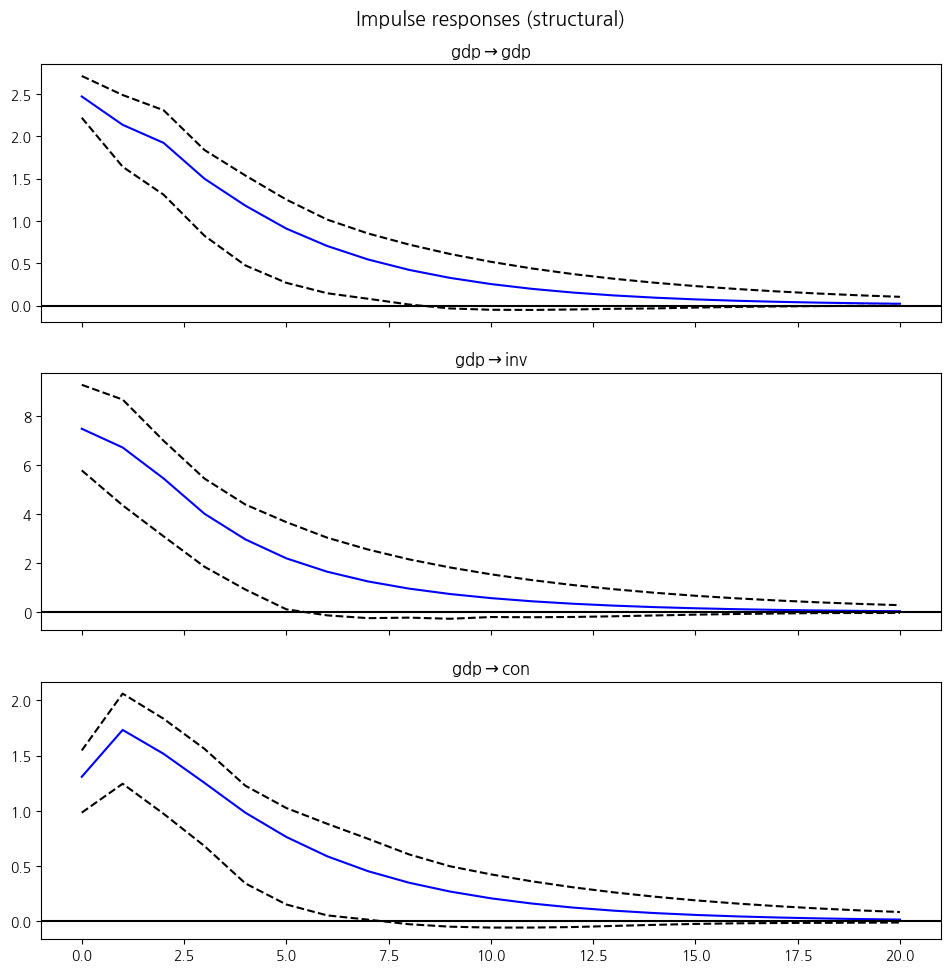

In [58]:
# SVAR모형의 A, B 정의 
A = np.asarray([[1, 0, 0],['E', 1, 0],['E', 'E', 1]])
B = np.asarray([['E', 0, 0], [0, 'E', 0], [0, 0, 'E']])

# 초깃값 부여
A_guess = np.asarray([0.5, 0.25, -0.38]) 
B_guess = np.asarray([0.5, 0.1, 0.05]) 

# SVAR모형 정의
mymodel = SVAR(endog, svar_type='AB', A=A, B=B, freq='Q')

# SVAR모형 추정
res = mymodel.fit(A_guess=A_guess, B_guess=B_guess, maxlags=2, maxiter=10000, maxfun=10000, solver='bfgs')

# 충격반응함수 그래프
res.irf(periods=20).plot(impulse='gdp', plot_stderr=True,
                             stderr_type='mc', repl=100);
